In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [110]:
# set configuration
sample_size = 100
nr_sample = 20
nr_moments = 20

# classificatio
test_size = 0.2
cv = 5

### Bounded distributions

In [111]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [112]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,...,m12,m13,m14,m15,m16,m17,m18,m19,m20,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,0.000366,0.000970,0.000105,0.000221,...,0.000052,0.000008,0.000012,0.000002,0.000003,6.192704e-07,7.129604e-07,1.681768e-07,1.746098e-07,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,0.000409,0.000897,0.000134,0.000200,...,0.000046,0.000012,0.000011,0.000003,0.000003,9.298998e-07,6.782450e-07,2.587606e-07,1.737966e-07,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,-0.000326,0.001171,-0.000116,0.000267,...,0.000062,-0.000011,0.000015,-0.000003,0.000004,-8.459083e-07,8.661964e-07,-2.310531e-07,2.128815e-07,arcsine


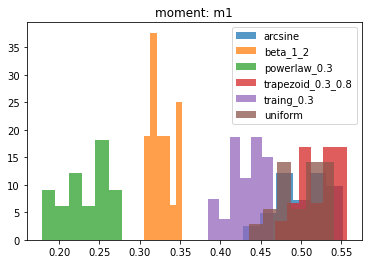

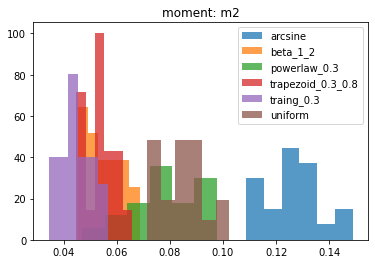

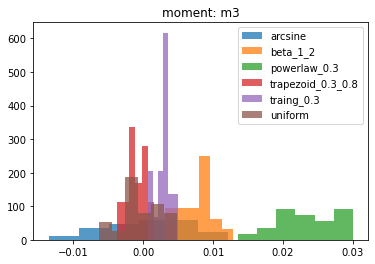

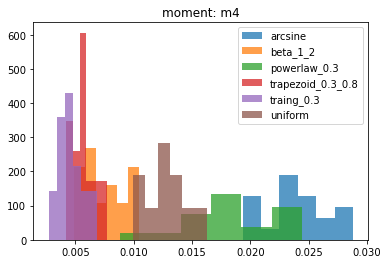

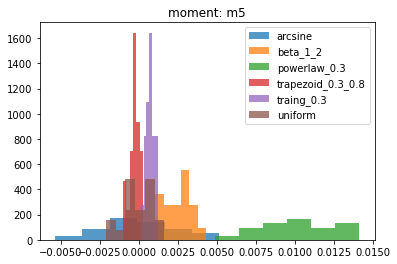

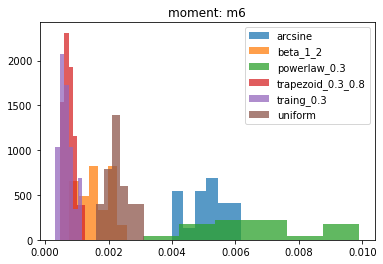

In [49]:
dem.get_histogram_of_moments(moments_df)

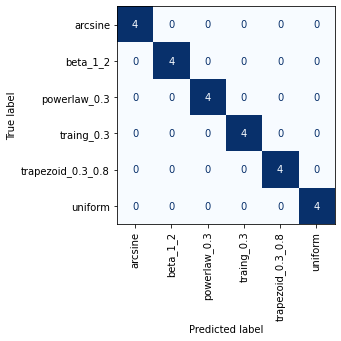

array([1.        , 1.        , 1.        , 0.94736842, 1.        ])

In [50]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [66]:
def cv_moments_sample_size(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        acc_ = [] 

        for j in nr_moments_list:
            df = dem.get_moments_df(samples, j)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc

In [108]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists)

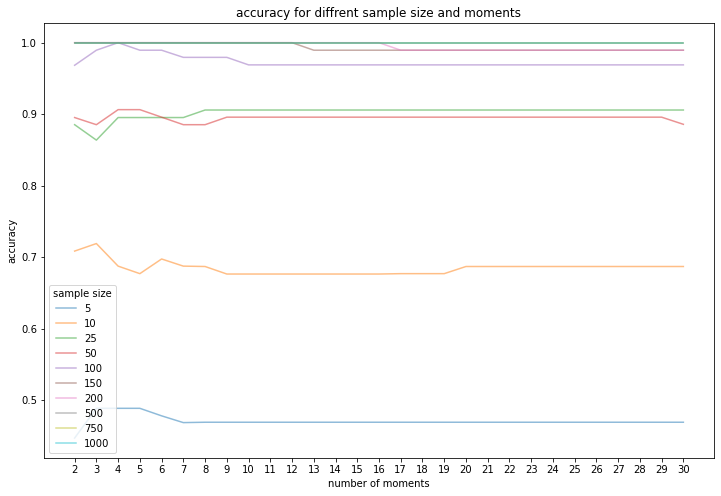

In [109]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(nr_moments_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
    plt.xticks(np.arange(min(nr_moments_list), max(nr_moments_list)+1, 1.0))
plt.show()

### Heavytail distributions

In [102]:
# set configuration
sample_size = 500
nr_sample = 20
nr_moments = 6

In [103]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [104]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,2.779658,6.421961e+01,5.452421e+03,6.362051e+05,8.039403e+07,1.042470e+10,cauchy
1,5.607938,8.720941e+02,2.990430e+05,1.195444e+08,5.059714e+10,2.209249e+13,cauchy
2,3.745959,1.512678e+02,1.866896e+04,3.112581e+06,5.694318e+08,1.079513e+11,cauchy
3,132.579376,7.789537e+06,4.840328e+11,3.016346e+16,1.879722e+21,1.171403e+26,cauchy
4,4.825650,9.782384e+02,5.157588e+05,3.112724e+08,1.930869e+11,1.206007e+14,cauchy


In [105]:
transformed_sampels = dict()
for name, samples in heavytail_samples.items():
    transformed_sampels[name] = np.log1p(samples)
    
moments_df = dem.get_moments_df(transformed_sampels, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,0.876862,0.559737,0.685496,2.072027,5.649270,17.900205,cauchy
1,0.935783,0.840612,1.687084,6.720574,26.717583,116.583803,cauchy
2,0.943585,0.711344,1.041983,3.381649,10.178257,34.739602,cauchy
3,0.965178,0.987189,3.619379,28.084757,245.103487,2304.865109,cauchy
4,0.864410,0.732931,1.500664,5.888309,23.960615,108.690952,cauchy


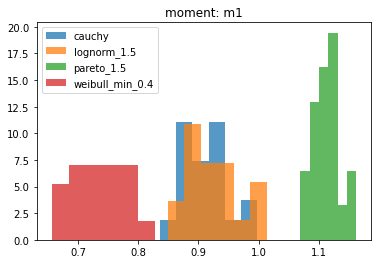

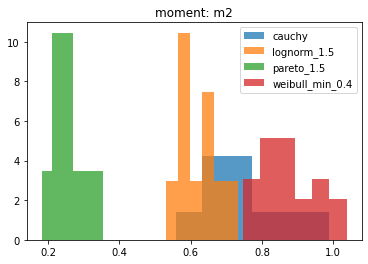

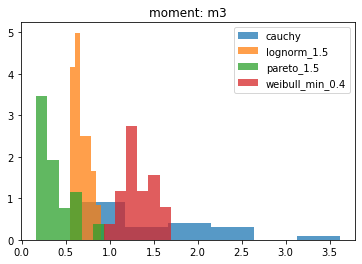

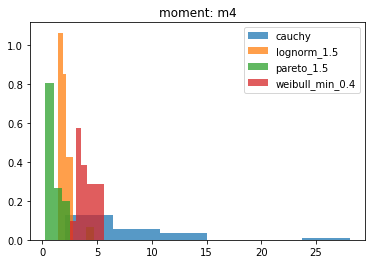

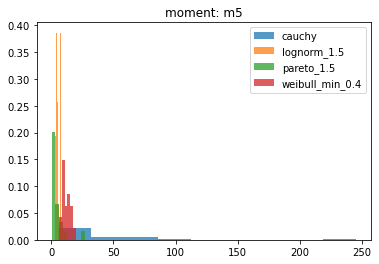

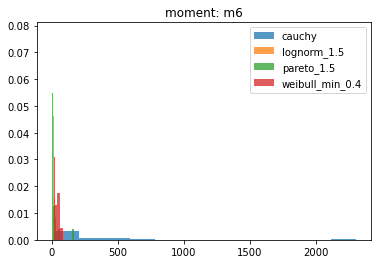

In [106]:
dem.get_histogram_of_moments(moments_df)

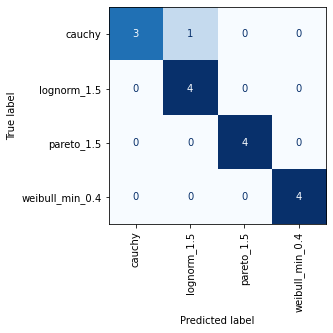

array([0.92307692, 0.92307692, 1.        , 1.        , 1.        ])

In [107]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [95]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cv_moments_sample_size_ht(sample_size_list, nr_moments_list, heavytail_dists)

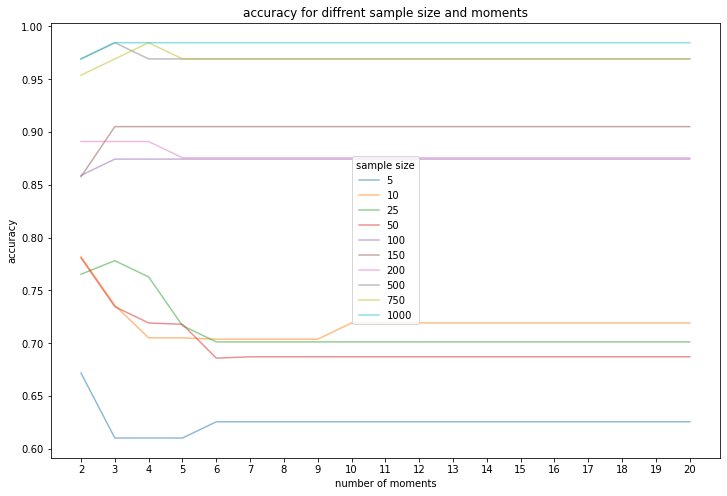

In [96]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(nr_moments_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
    plt.xticks(np.arange(min(nr_moments_list), max(nr_moments_list)+1, 1.0))
plt.show()

In [92]:
def cv_moments_sample_size_ht(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        tr_sampels = dict()
        for name, sample in samples.items():
            tr_sampels[name] = np.log1p(sample)
        acc_ = [] 

        for j in nr_moments_list:
            df = dem.get_moments_df(tr_sampels, j)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc